# Cournot competition in practice
|Name|SNR|
|----|-------|
|Judith van Dijk|1258672|
|Hiske van Rooi|1259698|

## Research question and subquestions
In this assignment, we will look at several forms of Cournot competition, being standard Cournot quantitiy competition and Stackelberg quantity competition. We will start with a short introduction about the theory behind the models, after which we will focus on several applications. We will look at both a symmetric and asymmetric two firm case for both models. Our research question will be:

- *Which model of Cournot competition has the preference?*

This question will be separated into several categories, for which we will show which party favors which form of competion. The subquestions of the research thus are:

- *Which model of Cournot competition is favoured by firms?*

- *Which model of Cournot competition gives the highest consumer surplus?*

In this assignment, we consider a duopoly who can decide the price $p$ of its products and who compete in quantities. We compare the price chosen by the firms with the welfare maximizing price.

## Motivation and introduction
Cournot competition is a repetitive theory in the field of economics. This assignment aims at teaching students, who are new to Cournot competition, the standard theory and prediction and the use of multiple models. Our research question is relevant for economics to provide economic intuition behind game theory and imporance of the use of economic models.

## Judith: korte introductie over Cournot competition en model Stackelberg met bronnen uit Game Theory boeken

## Method and assumptions
By modeling and defining relevant variables, we will find answers to our main research question and our subquestions. By changing the parameter values, we will also do a sensitivy analysis.


For answering the relevant question and subquestions, we make a couple of assumptions. First of all, we assume that there are only two firms in the market, maximizing their own profit. It is common knowledge that all players are rational and both firms produce a homogeneous good, so we have a case of perfect substitutes. The profit function of each player is stricly concave and in the symmetric case, discussed below, we assume homogeneous costs. In the asymmetric case however, we assume heterogeneity in costs. For all cases we assume the constant in the equation to be equal for all firms. Lastly, we assume that there are no fixed costs.

## Execution
The inverse market demand function depends on the quantity $Q$ in the following way:

$$
p(Q) = max (a - Q; 0)
$$



In [1]:
# We define the inverse market demand function
minp = 0

def p(a,q_i,q_j):
    p = a - (q_i + q_j)
    return p

def demand(a,q_i, q_j):
    p = a - (q_i + q_j)
    p = max(minp, p)
    p = min(maxp, p)
    return p

In the above code we defined the inverse demand function. First we stated the base of the inverse demand function, for which we state the reaction function of price to quantity. Next we constricted the inverse demand function to be non-negative. We will start with the standard two firm case below.

### Standard two firm case
In the standard two firm case there are two firms, firm i and firm j. We will start with defining the specifics of the two firm game. Here total quantity produced is the sum of the quantity of firm i and firm j, so: $Q = q_i + q_j$. The profit of the firm equals total revenue (price times own quantity produced) minus total costs (marginal costs times own quantity produced). The best response function is calculated by setting the FOC equal to zero.

Inverse demand function: 
$
p(Q) = max(a - Q; 0) = a - (q_i + q_j)
$


Cost functions: 
$
C_i(q_i) = c_i*q_i
$


Number of players: 
$
I = 2
$


Strategy sets: 
$S_i = [0; \infty); i = 1; 2
$


Payoff functions: 
$\pi_i(q_i; q_j) = (p - c_i) * q_i 
= (a - (q_i + q_j) - c_i)q_i; i = 1; 2; i \neq j
$

First order condition (FOC):
$\pi_i' = a - 2q_i - q_j - c_i
$

Best response function firm i:
$q_i = 1/2(a - q_j - c_i)
$

Best response function firm j:
$q_j = 1/2(a - q_i - c_j)
$

In [2]:
# We define the cost function, marginal cost funtion, profit function and the first order condition for both firms
def cost(c_i,q_i):
    return c_i*q_i

def mc(c_i):
    return c_i

def profit_firm_i(a,q_i,q_j,c_i):
    profit = (p(a,q_i,q_j) - mc(c_i))*q_i
    return profit

def FOC_i(a,q_i,q_j,c_i):
    FOC_i = a - 2*q_i - q_j - c_i
    return FOC_i

def cost(c_j,q_j):
    return c_j*q_j

def mc(c_j):
    return c_j

def profit_firm_j(a,q_i,q_j,c_j):
    profit = (p(a,q_i,q_j) - mc(c_j))*q_j
    return profit

def FOC_j(a,q_i,q_j,c_j):
    FOC_j = a - 2*q_j - q_i - c_j
    return FOC_j

In [3]:
# We now define the best response functions for both firms, setting the FOC equal to zero
def BR_i(a,q_j,c_i):
    q_i = 0.5*(a - q_j - c_i)
    return q_i

def BR_j(a,q_i,c_j):
    q_j = 0.5*(a - q_i - c_j)
    return q_j

In [4]:
import pandas as pd
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Cournot: Symmetric and Asymmetric
We start with the standard Cournot model. As described, in the Cournot model firms choose their quantities and the price follows. In this case, both firms choose their quantitiy simultaneously. In that way, no firm can set their quantity according to the other firm's chosen quantity. We use all standard equations described above. In this section, we will introduce two cases: the symmetric Cournot case and the asymmetric Cournot case. 

In the symmetric case, both firms have the same marginal costs ($c_i = c_j = 10$). Therefore, both profit and best response functions will be the same.

In the asymmetric case however, the marginal costs of the two firms differ (with $c_i = 10$ and $c_{jh} = 25$). The profit function of firm i will not change in comparison with the symmetric case, but the profit function of firm j will change due to the changed marginal costs. Below we will show the profit functions in a graph and compare the two scenarios.

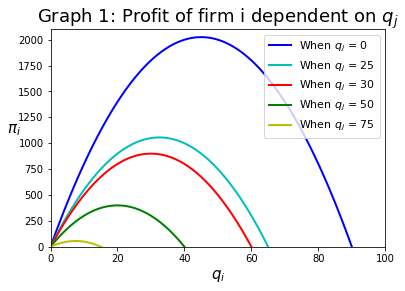

In [25]:
# We show the profit function of firm i dependent on the choice of the quantity of firm j
# We will start with a symmetric case, where the constant 'a' and the marginal costs are the same for both firms
a = 100
c_i = 10
c_j = 10
c_j_h = 25 # this equals the costs of firm j under the asymmetric case we will discuss below

# The constant 'a' is set at 100 and a quantity above 100 will result in negative inverse demand
q_i = arange(0.0,101.0,1.0) 
q_j = arange(0.0,101.0,1.0)

# We create a graph, showing several profit functions of firm i dependent on q_j
plt.clf()
plt.plot(q_i, profit_firm_i(a,q_i,0,c_i),'-', color = 'b', linewidth = 2, label="When $q_j$ = 0")
plt.plot(q_i, profit_firm_i(a,q_i,25,c_i),'-', color = 'c', linewidth = 2, label="When $q_j$ = 25")
plt.plot(q_i, profit_firm_i(a,q_i,30,c_i),'-', color = 'r', linewidth = 2, label="When $q_j$ = 30")
plt.plot(q_i, profit_firm_i(a,q_i,50,c_i),'-', color = 'g', linewidth = 2, label="When $q_j$ = 50")
plt.plot(q_i, profit_firm_i(a,q_i,75,c_i),'-', color = 'y', linewidth = 2, label="When $q_j$ = 75")
plt.title("Graph 1: Profit of firm i dependent on $q_j$",fontsize = 18)
plt.xlabel("$q_i$",fontsize = 15)
plt.ylabel("$\pi_i$",fontsize = 15, rotation = 0)
plt.xlim(0,100)
plt.ylim(0,2100)
plt.legend(fontsize = 11)
plt.show()

In Graph 1 above, one can see multiple profit functions of firm i dependent on the chosen quantity of firm j $q_j$. One can see that the lower the $q_j$, the higher the plotted line of $\pi_i$. Firm i will always choose to maximize its profit by choosing $q_i$ at the top of the parabola. One can calculate this point by taking the derivative of the profit and setting it equal to zero ($\pi_i' = 0$). Since we assume homogeneous costs for both firms, this is how the profit of firm j dependent on $q_i$ would look like as well.

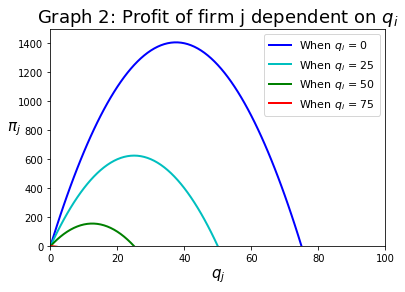

In [24]:
# This is the asymmetric case, where the constant 'a' is equal for both firms but the marginal costs are not
plt.clf()
plt.plot(q_j, profit_firm_j(a,0,q_j, c_j_h),'-', color = 'b', linewidth = 2, label="When $q_i$ = 0")
plt.plot(q_j, profit_firm_j(a,25,q_j, c_j_h),'-', color = 'c', linewidth = 2, label="When $q_i$ = 25")
plt.plot(q_j, profit_firm_j(a,50,q_j, c_j_h),'-', color = 'g', linewidth = 2, label="When $q_i$ = 50")
plt.plot(q_j, profit_firm_j(a,75,q_j, c_j_h),'-', color = 'r', linewidth = 2, label="When $q_i$ = 75")
plt.title("Graph 2: Profit of firm j dependent on $q_i$",fontsize = 18)
plt.xlabel("$q_j$",fontsize = 15)
plt.ylabel("$\pi_j$",fontsize = 15, rotation = 0)
plt.xlim(0,100)
plt.ylim(0,1500)
plt.legend(fontsize = 11)
plt.show()

One can see from Graph 2 that the profit curves for the high-cost-firm j are lower than in Graph 1. The profit functions for firm i will still look the same as in Graph 1, since their marginal costs do not change. From this graph we can see that higher marginal costs leads to lower profit, ceteris paribus.

We are now interested in the equilibrium of this game. We find this equilibrium by setting the best-respnose functions equal to each other. In Graph 3 below, we will show you the best-response functions for both the symmetric and asymmetric case.

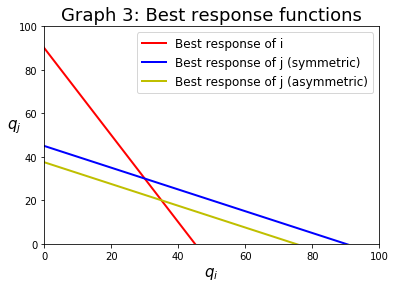

In [23]:
# We now compare the best-response functions for both the symmetric (with c_j) and asymmetric case (with c_j_h)
plt.clf()
plt.plot(BR_i(a,q_j,c_i), q_j,'-', color = 'r', linewidth = 2, label="Best response of i")
plt.plot(q_i, BR_j(a,q_i,c_j),'-', color = 'b', linewidth = 2, label="Best response of j (symmetric)")
plt.plot(q_i, BR_j(a,q_i,c_j_h),'-', color = 'y', linewidth = 2, label="Best response of j (asymmetric)")
plt.title("Graph 3: Best response functions",fontsize = 18)
plt.xlabel("$q_i$",fontsize = 15)
plt.ylabel("$q_j$",fontsize = 15,rotation = 0)
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend(fontsize = 12)
plt.show()

## Judith: Latex/markdown uitleg over hoe de BR wordt ingevuld/uitgewerkt (gelijk aan wat er beneden bij Stackelberg is uitgelegd)

The intersections of the red line with the blue line (symmetric) and with the red line (asymmetric) can also be mathematically calculated by setting the best-response functions equal to eachother. Python will calculate this for us below. 

In [13]:
# We define the Cournot equilibrium equations for the firm i and j as derived above
def cournot_i(a,c_i,c_j):
    cournot_i = (1/3)*(a - 2*c_i + c_j)
    return cournot_i

def cournot_j(a,c_i,c_j):
    cournot_j = (1/3)*(a + c_i - 2*c_j)
    return cournot_j

# We calculate the best response for both firms in both cases
print("Best reponse of player i in the symmetric case equals " + str(cournot_i(a,c_i,c_j))[:2])
print("Best reponse of player j in the symmetric case equals " + str(cournot_j(a,c_i,c_j))[:2])
print("Best reponse of player i in the asymmetric case equals " + str(cournot_i(a,c_i,c_j_h))[:2])
print("Best reponse of player j in the asymmetric case equals " + str(cournot_j(a,c_i,c_j_h))[:2])

Best reponse of player i in the symmetric case equals 30
Best reponse of player j in the symmetric case equals 30
Best reponse of player i in the asymmetric case equals 35
Best reponse of player j in the asymmetric case equals 20


We also check whether the FOC-equations of the firms are satisfied. In equilibrium, the first order constraint should be equal to zero.

In [14]:
# The first two code lines are for the symmetric case, the latter two are for the asymmetric case
# We check this by filling in the equilibrium quantities of firm i and j
print ("The FOC of player i gives " + str((FOC_i(a,30,30,c_i))))
print ("The FOC of player j gives " + str((FOC_j(a,30,30,c_j))))
print ("The FOC of player i gives " + str((FOC_i(a,35,20,c_i))))
print ("The FOC of player j gives " + str((FOC_j(a,35,20,c_j_h))))

The FOC of player i gives 0
The FOC of player j gives 0
The FOC of player i gives 0
The FOC of player j gives 0


In Graph 3, one can see the best response functions for both firms under the symmetric (red and blue line) and asymmetric (red and yellow line) case. One can see that the $q_i$ is decreasing when $q_j$ is increasing, and vice versa. The intersection of the red and blue line is at $(q_i,q_j) = (30,30)$. The equilibrium quantity in a symmetric two firm case of both $q_i$ and $q_j$ is thus $30$. This can also be seen in the best responses of player i above. There exists a (unique) symmetric equilibrium for both players choosing a quantity of $30$. 

The intersection of the red and yellow line is at $(q_i,q_j) = (35,20)$. The equilibrium quantity in the asymmetric case of  $q_i$ is thus $35$ and for $20$ for high-cost-firm j. A higher marginal costs ($c_{jh} > c_j$) thus results in lower production. Being the low-cost-firm increases the produced quantity in comparison with the symmetric case.

Apart from calculating the equilibrium quantity, we are interested in the equilibrium price and profits for both firms in both cases. We can fill in the calculated equilibrium quantities in the profit functions and in the price functions derived aove.

In [20]:
# We calculate the equilibrium profits and price when both choose equilibrium quantities
print ("The profit of player i in symmetric case equals " + str((profit_firm_i(a,30,30,c_i))) + " and equals " + str(((profit_firm_i(a,35,20,c_i)))) + " in the asymmetric case.")
print ("The profit of player j in symmetric case equals " + str((profit_firm_j(a,30,30,c_j))) + " and equals " + str((profit_firm_j(a,35,20,c_j_h))) + " in the asymmetric case.")
print ("The total profit in the symmetric case equals " + str((profit_firm_i(a,30,30,c_i))+(profit_firm_j(a,30,30,c_j))) + ".")
print ("The total profit in the asymmetric case equals " + str((profit_firm_i(a,35,20,c_i))+(profit_firm_j(a,35,20,c_j_h))) + ".")
print ("The equilibrium price (p*) in symmetric case equals " + str(p(a,30,30)) + " and equals " + str(p(a,35,20)) + " in the asymmetric case.")

The profit of player i in symmetric case equals 900 and equals 1225 in the asymmetric case.
The profit of player j in symmetric case equals 900 and equals 400 in the asymmetric case.
The total profit in the symmetric case equals 1800.
The total profit in the asymmetric case equals 1625.
The equilibrium price (p*) in symmetric case equals 40 and equals 45 in the asymmetric case.


In this sectrion we compared a symmetric Cournot case with an asymmetric one. We will refer to the symmetric case with a subscript 1 and to the asymmetric case with a subscript 2. Our findings are that in the symmetric case, the equilibrium quantity and profits are the same for both firms. In the asymmetric case, the low-cost firm produces more and makes more profit ($q_{i2} = 35 > q_{i1} = 30$ and $\pi_{i2} = 1225 > \pi_{i1} = 900$), whereas the high-cost firm produces less and makes less profit ($q_{j2} = 20 < q_{j1} = 30$ and $\pi_{j2} = 400 < \pi_{j1} = 900$). There is a lower total quantity in the asymmetric case than in the symmetric case ($Q_1 = 60 > Q_2 = 55$), a lower total profit ($\pi_{T2} = 1625 < \pi_{T1} = 1800$) and a higher equilibrium price ($p_2* = 45 > p_1* = 40$). 

### Stackelberg: Symmetric and Asymmetric
In the Stackelberg model there is quantity competition, as in the Cournot model described above. However, now the firms do not make decisions simultaneously. In the Stackelberg game there is a dominant firm, called the Stackelberg leader, and a weak firm, the Stackelberg follower. We will describe three cases in this section.
- *Symmetric Stackelberg*: the dominant firm and the weak firm have the same marginal costs. We will refer to this scenario as *case 1*.
- *Asymmetric Stackelberg 1*: the dominant firm is the low-cost firm and the Stackelberg follower is the high-cost firm. We will refer to this scenario as *case 2*.
- *Asymmetric Stackelberg 2*: the Stackelberg leader is the high-cost firm, whereas the weak firm is the low-cost firm. We will refer to this scenario as *case 3*.

#### Solving the Stackelberg Game
In case 1, both firms have identical marginal costs of 10. Firm i is the dominant firm and firm j is the weaker following firm. This model thus has two periods: leading firm i sets its quantity in period 1 and the following firm j sets its quantity in period 2, observing the quantity of the dominant firm $q_i$. This game can be solved by backward induction, which means we'll solve the second stage first. The marginal costs, demand function, profit function and best-response function are the same as mentioned above. Firm j will adjust its $q_j$ to $q_i$ by using its best-response function. From now on we'll use subscript $l$ to indicate the leading firm and subscript $f$ to indicate the following firm.

The best-respose function of the following firm: $ q_f = 1/2(a - q_l - c_f)$

Firm $l$, anticipating optimal behavior by firm $f$, will maximize its $\pi_l$ by setting $q_l$ accordingly. 

$\pi_l(q_l; q_f) = (a - q_l - q_f(q_l) - c_l)q_l
= (a - q_l - c_l - 1/2(a - q_l - c_f))q_l
$

$= (a - q_l - c_l - 1/2a + 1/2q_l + 1/2c_f)q_l = (1/2a - 1/2q_l - c_l + 1/2c_f)q_l
$

$\pi_l'(q_l; q_f) = 1/2a - q_l - c_l - + 1/2c_f
$

$FOC_l = q_l* = 1/2(a - 2c_l + c_f)$

One can retrieve the equilibrium $q_f$ by filling in the $FOC_l$ in the best-response function of $q_f$.

$q_f = 1/2(a - 1/2(a - 2c_l + c_f) - c_f) = 1/2(a - 1/2a + c_l - 1/2c_f - c_f = 1/4a + 1/2c_l - 3/4c_f $

$q_f*= 1/4(a + 2c_l - 3c_f)$

In Case 1, where $c_l = c_f = 10$ the $q_l*$ equals $1/2(a-c)$ and $q_f*$ equals $1/4(a-c)$. Below we will find the equilibrium quantities, price and profits using Python for all three cases.

In [16]:
# We define the Stackelberg equilibrium equations for the leading and following firm as derived above
def stackelberg_l(a,c_l,c_f):
    stackelberg_l = (1/2)*(a - 2*c_l + c_f)
    return stackelberg_l

def stackelberg_f(a,c_l,c_f):
    stackelberg_f = (1/4)*(a + 2*c_l - 3*c_f)
    return stackelberg_f

# We calculate the best response of both firms in the three cases
print("Best reponse of player i in the symmetric case equals " + str(stackelberg_l(a,c_i,c_j))[:2])
print("Best reponse of player j in the symmetric case equals " + str(stackelberg_f(a,c_i,c_j)))
print("Best reponse of player i in the asymmetric case equals " + str(stackelberg_l(a,c_i,c_j_h)))
print("Best reponse of player j in the asymmetric case equals " + str(stackelberg_f(a,c_i,c_j_h)))
print("Best reponse of player i in the asymmetric case equals " + str(stackelberg_l(a,c_j_h,c_i))[:2])
print("Best reponse of player j in the asymmetric case equals " + str(stackelberg_f(a,c_j_h,c_i))[:2])

Best reponse of player i in the symmetric case equals 45
Best reponse of player j in the symmetric case equals 22.5
Best reponse of player i in the asymmetric case equals 52.5
Best reponse of player j in the asymmetric case equals 11.25
Best reponse of player i in the asymmetric case equals 30
Best reponse of player j in the asymmetric case equals 30


In [17]:
# Now we are curious to see the equilibrium price and equilbrium profits when both choose equilibrium quantities.
print ("In the symmetric case, the profit of firm i is " + str((profit_firm_i(a,45,22.5,c_i))) + " and the profit of firm j is " + str((profit_firm_j(a,45,22.5,c_j))) + ".") 
print ("The total profit equals " + str((profit_firm_i(a,45,22.5,c_i)) + (profit_firm_j(a,45,22.5,c_j))) + " and the equilibrium price (p*) is " + str(p(a,45,22.5)) + ".")
print ("")

print ("In the asymmetric case (where the leader (i) is the low-cost firm), the profit of firm i is " + str((profit_firm_i(a,52.5,11.25,c_i))) + " and the profit of firm j is " + str((profit_firm_j(a,52.5,11.25,c_j_h))) + ".")
print ("The total profit equals " + str((profit_firm_i(a,52.5,11.25,c_i)) + (profit_firm_j(a,52.5,11.25,c_j_h))) + " and the equilibrium price (p*) is " + str(p(a,52.5,11.25)) + ".")
print ("")
print ("In the asymmetric case (where the leader (j) is the high-cost firm), the profit of firm i is " + str((profit_firm_i(a,30,30,c_i))) + " and the profit of firm j is " + str((profit_firm_j(a,30,30,c_j_h))) + ".")
print ("The total profit equals " + str((profit_firm_i(a,30,30,c_i)) + (profit_firm_j(a,30,30,c_j_h))) + " and the equilibrium price (p*) is " + str(p(a,30,30)) + ".")

In the symmetric case, the profit of firm i is 1012.5 and the profit of firm j is 506.25.
The total profit equals 1518.75 and the equilibrium price (p*) is 32.5.

In the asymmetric case (where the leader (i) is the low-cost firm), the profit of firm i is 1378.125 and the profit of firm j is 126.5625.
The total profit equals 1504.6875 and the equilibrium price (p*) is 36.25.

In the asymmetric case (where the leader (j) is the high-cost firm), the profit of firm i is 900 and the profit of firm j is 450.
The total profit equals 1350 and the equilibrium price (p*) is 40.


In this section we compared a symmetric Stackelberg case with two asymmetric cases (one in which the leading firm is the low-cost firm (case 2) and one in which the leading firm is the high-cost firm (case 3.) We see that:

(1) $q_{i2} > q_{i1} > q_{i3}$ and that $q_{j3} > q_{j1} > q_{j2}$.

(2) $p_3* > p_2* > p_1*$

(3) $\pi_{i2} > \pi_{i1} > \pi_{i3}$ and that $\pi_{j1} > \pi_{j3} > \pi_{j2}$

(4) $\pi_{T1} > \pi_{T2} > \pi_{T3}$

In all cases, we see that it pays to be a leader. In the first case, the leader i has the highest quantity and profit. In case 2, the low-cost firm i has an even higher quantity and profit than in case 1. Lastly, in case 3 we see that the high-cost firm j can better be a leader than a follower, as in case 2. Total profits are highest in the homogeneous cost case.

### Consumer surplus
We have seen what the different scenarios do to the equilibrium quantity, price and (total) profits. However, we do not know yet which scenario is best for consumers. We can find this out by calculating the so called consumer surplus in all five scenarios. The formula for the consumer surplus is $CS = 1/2 * (a - p) * Q$.

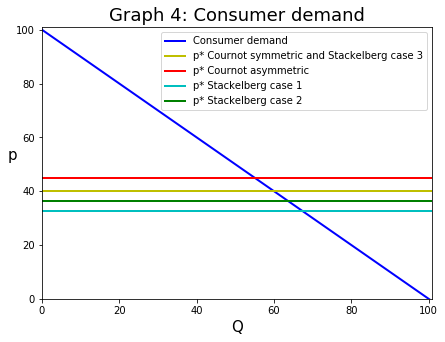

Symmetric Cournot: Consumer surplus is equal to 1800
Asymmetric Cournot: Consumer surplus is equal to 1512.5
Stackelberg case 1: Consumer surplus is equal to 2278.125
Stackelberg case 2: Consumer surplus is equal to 2032.03125
Stackelberg case 3: Consumer surplus is equal to 1800


In [22]:
# We want to visualize the consumer demand with the calculated p* in order to calculate consumer surplus
Q = q_i + q_j

# We create a line for the consumer demand and all horizontal lines equal the p* in all five cases described above
plt.figure(figsize=(7,5))
plt.plot(Q, p(a,q_i,q_j),'-', color = 'b', linewidth = 2, label="Consumer demand")
plt.axhline(y=40, xmin=0, xmax=100, color = 'y', linewidth = 2, label="p* Cournot symmetric and Stackelberg case 3")
plt.axhline(y=45, xmin=0, xmax=100, color = 'r', linewidth = 2, label="p* Cournot asymmetric")
plt.axhline(y=32.5, xmin=0, xmax=100, color = 'c', linewidth = 2, label="p* Stackelberg case 1")
plt.axhline(y=36.25, xmin=0, xmax=100, color = 'g', linewidth = 2, label="p* Stackelberg case 2")
plt.title("Graph 4: Consumer demand",fontsize = 18)
plt.xlabel("Q",fontsize = 15)
plt.ylabel("p",fontsize = 15, rotation = 0)
plt.xlim(0,101)
plt.ylim(0,101)
plt.legend(fontsize = 10)
plt.show()

# From the graph we calculate the consumer surplus, which is equal to the triangle between the blue and horizontal lines
# We do this by filling in the equilibrium quantities and the total quantity produced
print ("Symmetric Cournot: Consumer surplus is equal to " + str(((a-p(a,30,30))*(60))*1/2)[:4])
print ("Asymmetric Cournot: Consumer surplus is equal to " + str(((a-p(a,35,20))*(55))*1/2))
print ("Stackelberg case 1: Consumer surplus is equal to " + str(((a-p(a,45,22.5))*(67.5))*1/2))
print ("Stackelberg case 2: Consumer surplus is equal to " + str(((a-p(a,52.5,11.25))*(63.75))*1/2))
print ("Stackelberg case 3: Consumer surplus is equal to " + str(((a-p(a,30,30))*(60))*1/2)[:4])

As can be seen above $CS_{s1} > CS_{s2} > CS_{c1} = CS_{s3} > CS_{c2}$, where $si$ stands for the i<sup>th</sup> Stackelberg case and $ci$ stands for the i<sup>th</sup> Cournot case. The symmetric Stackelberg case, with a dominant and weaker firm with the same marginal costs, is thus best for consumers and the asymmetric Cournot case, with simultaneous movement and different costs, is the worst for consumers.

## Conclusion
In this section we will note the main conclusions we found. In the table below one can easily see the differences between all cases discussed and all relevant calculated variables. We have visualized these data in a bar graph below.

||Symmetric Cournot|Asymmetric Cournot|Symmetric Stackelberg|Stackelberg i=low-cost|Stackelberg i=high-cost|
|----|-------|
|$q_i$|30|35|45|52.5|30|
|$q_j$|30|20|22.5|11.25|30|
|$Q$|60|55|67.5|63.75|60|
|$p*$|40|45|32.5|36.25|40|
|$\pi_i$|900|1225|1012.5|1378.125|900|
|$\pi_j$|900|400|506.25|126.5625|450|
|$\pi_{total}$|1800|1625|1518.75|1504.6875|1350|
|$CS$|1800|1512.5|2278.125|2032.03125|1800|

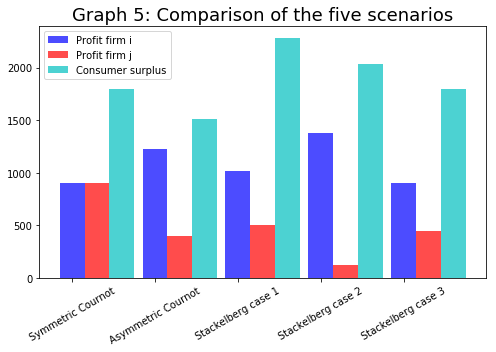

In [28]:
# We create a bar graph to visualize profits of firm i and j and the consumer surplus in all cases described
ngroups = 5
pi_i = [900,1225,1012.5,1378.125,900]
pi_j = [900,400,506.25,126.5625,450]
CS = [1800,1512.5,2278.125,2032.03125,1800]
index = np.arange(ngroups)
bar_width = 0.3
opacity = 0.7

plt.figure(figsize=(7,5))
rects1 = plt.bar(index, pi_i, bar_width, alpha = opacity, color='b', label='Profit firm i')
rects2 = plt.bar(index + bar_width, pi_j, bar_width, alpha = opacity, color='r', label='Profit firm j')
rects2 = plt.bar(index + 2*bar_width, CS, bar_width, alpha = opacity, color='c',label='Consumer surplus')
plt.title('Graph 5: Comparison of the five scenarios', fontsize = 18)
plt.xticks(index, ("Symmetric Cournot", "Asymmetric Cournot", "Stackelberg case 1", "Stackelberg case 2","Stackelberg case 3"), rotation = 30)
plt.legend(fontsize = 10)
plt.tight_layout()
plt.show()

Our main research question was "*Which model of Cournot competition has the preference?*", with the following subquestions:

- *Which model of Cournot competition is favoured by firms?*

- *Which model of Cournot competition gives the highest consumer surplus?*

There is not one Cournot competition model that has the preference in all cases and for all target groups.

- Firm i would prefer Stackelberg with asymmetric costs, in which he is the low-cost leading firm. That way, firm i has the highest profits.
- Firm j would prefer the symmetric Cournot model, where firm i and j choose a quantity simultaneously.
- Consumers would prefer the symmetric Stackelberg model, where firm i (the leader) and firm j (the follower) have the same marginal costs.

## Discussion
In this assignment, we only looked at cases with two firms and with a change to one other cost ($c_j$ from 10 to $c_{jh}$ of 25). Of course a lot of other applications can be executed using Cournot and/or Stackelberg games. For example, one can look at applications with more than two firms or even with n firms. One can also look at scenarios where there are multiple firms with multiple different marginal costs. Of course, this would change the results in relevant variables. One could also look into a case where there are fixed costs. For some variables this would not change much, since fixed costs would disappear if one takes the derivative of the profit.

Since this sort of quantity competition is very important in economics, it is always interesting to look at moor developed and other applications. 